Import primary data-structure OR primary plus additional parameters calculated during preprocessing

In [165]:
# As this is faster than loading the full data-structure, the seperation saves time on partial analysis and debugging
# full data-structure, initial parameter and covariate sets
%run fMRI_prestats_data-struct.ipynb

subject(s) missing!
First line of list-alignment:   FED006 FED006 FED007
Control relevant files!


 The following subjects where excluded from further analysis due to false file numbers or missing data:  
 EPI:  ['FED006'] T1:  ['FED006']
The new subject list after initial data and image file checkup:

['FED007', 'FED008', 'FED009', 'FED010', 'FED011', 'FED012', 'FED013', 'FED014', 'FED015', 'FED016', 'FED017', 'FED018', 'FED019', 'FED020', 'FED021', 'FED022', 'FED023', 'FED024', 'FED025', 'FED026', 'FED027', 'FED028', 'FED029', 'FED030', 'FED031', 'FED032', 'FED033', 'FED034', 'FED035', 'FED036', 'FED037', 'FED038', 'FED039', 'FED040', 'FED041', 'FED042', 'FED043', 'FED044', 'FED045', 'FED046', 'FED047', 'FED048', 'FED049', 'FED050', 'FED051', 'FED052', 'FED053', 'FED054', 'FED055', 'FED056', 'FED057', 'FED058', 'FED059', 'FED060', 'FED061', 'FED062', 'FED063', 'FED064', 'FED065', 'FED066', 'FED067', 'FED068']


That leaves a total of  62 remaining subjects.


The following parameters

In [1]:
# full data-structure, parameter and covariate sets including parameters extracted during preprocessing
# can take up to 10 mins, depending on overall computational load in present environment (usually ~ 5mins)
%run fMRI_prestats_data-struct2-prepadds.ipynb

subject(s) missing!
First line of list-alignment:   FED006 FED006 FED007
Control relevant files!


 The following subjects where excluded from further analysis due to false file numbers or missing data:  
 EPI:  ['FED006'] T1:  ['FED006']
The new subject list after initial data and image file checkup:

['FED007', 'FED008', 'FED009', 'FED010', 'FED011', 'FED012', 'FED013', 'FED014', 'FED015', 'FED016', 'FED017', 'FED018', 'FED019', 'FED020', 'FED021', 'FED022', 'FED023', 'FED024', 'FED025', 'FED026', 'FED027', 'FED028', 'FED029', 'FED030', 'FED031', 'FED032', 'FED033', 'FED034', 'FED035', 'FED036', 'FED037', 'FED038', 'FED039', 'FED040', 'FED041', 'FED042', 'FED043', 'FED044', 'FED045', 'FED046', 'FED047', 'FED048', 'FED049', 'FED050', 'FED051', 'FED052', 'FED053', 'FED054', 'FED055', 'FED056', 'FED057', 'FED058', 'FED059', 'FED060', 'FED061', 'FED062', 'FED063', 'FED064', 'FED065', 'FED066', 'FED067', 'FED068']


That leaves a total of  62 remaining subjects.


The following parameters

In [2]:
# control results
key = random.sample(data.keys(), 1)
print(data[key[0]])
print(data["FED007"])

{'files': ['/fMRI/FED039/FMRI_0010_20151001173950.json', '/fMRI/FED039/FMRI_0010_20151001173950.nii.gz', '/fMRI/FED039/FMRI_0010_20151001173950_distcor.nii', '/fMRI/FED039/FMRI_distcor_effect.nii', '/fMRI/FED039/FMRI_mc-ri-s5-cr-m-in.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s5-cr-m-in2x.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s5-cr-m.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s5-cr.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s5-cr_mean.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s5.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s5.nii.gz_usan_size.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s8.nii.gz', '/fMRI/FED039/FMRI_mc-ri-s8.nii.gz_usan_size.nii.gz', '/fMRI/FED039/FMRI_mc-ri.nii.gz', '/fMRI/FED039/FMRI_mc-ri_mean.nii.gz', '/fMRI/FED039/FMRI_mc.nii.gz', '/fMRI/FED039/FMRI_mc_mask.nii.gz', '/fMRI/FED039/FMRI_mc_masked.nii.gz', '/fMRI/FED039/FMRI_mc_mean.nii.gz', '/fMRI/FED039/FMRI_mc_overlay.nii.gz', '/fMRI/FED039/FMRI_robintthresh.nii.gz', '/fMRI/FED039/FMRI_robintthresh_dil.nii.gz', '/fMRI/FED03

 Pre-configurations

In [2]:
# (Re-)activate nipype's INFO output for interfaces and workflows , as we want to see what's going on
logging.getLogger('nipype.interface').setLevel("INFO")
logging.getLogger('nipype.workflow').setLevel("INFO")

In [3]:
# set default data ouput for all FSL operations
fsl.FSLCommand.set_default_output_type('NIFTI_GZ')

In [4]:
# define additional directories
grouptemplate_dir = f"{basedir}MNI_templates/"

Custom functions

In [6]:
# write function to iterate over lists in adjoining pairs within the Harvard Oxford atlas
def pairwise(iterable):
    "s -> (s0, s1), (s2, s3), (s4, s5)..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

Template modelling

In [7]:
# Harvard Oxford atlas for suitability and fit to hypotheses
harox_cort = datasets.fetch_atlas_harvard_oxford("cort-prob-2mm", data_dir=None, symmetric_split=False, resume=True, verbose=1)
harox_sub = datasets.fetch_atlas_harvard_oxford("sub-prob-2mm", data_dir=None, symmetric_split=False, resume=True, verbose=1)

# list of label indexing starts at 1! 0/Background is not conform with images, regional indexing starts at 0^^


Dataset created in /home/martin/nilearn_data/fsl



Downloaded 25280512 of 25716861 bytes (98.3%,    0.5s remaining) ...done. (30 seconds, 0 min)
Extracting data from /home/martin/nilearn_data/fsl/e84ad0263d578b399912ab057c50aa50/HarvardOxford.tgz..... done.


Available cortical regions via the Harvard-Oxford probabilistic atlas: 
 ['Background', 'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior division', 'Lateral Occipital Cortex, inferior division', 'Intracalcarine Cortex', 'Frontal Medial Cortex', 'Juxtapositional Lobule Cortex (fo

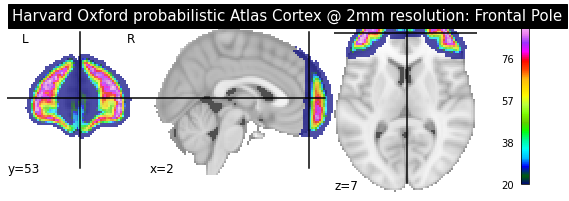

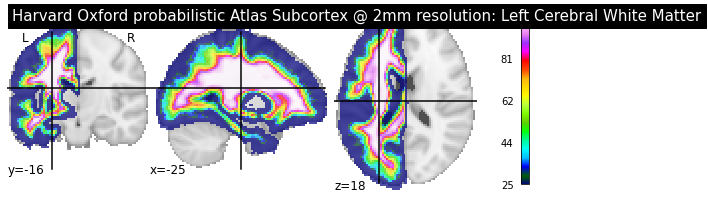

In [10]:
# print a list of available regions in two atlases
print("Available cortical regions via the Harvard-Oxford probabilistic atlas: \n", harox_cort.labels, len(harox_cort.labels))
print("\nAvailable subcortical regions via the Harvard-Oxford probabilistic atlas: \n", harox_sub.labels, len(harox_sub.labels))


# print thresholded cortical testregion (thresholding visually optimised^^)
for label in range(0, nb.load(harox_cort.maps).shape[-1] - 47):
    ni_plt.plot_roi(ni_img.index_img(harox_cort.maps, label),
                    title=f"Harvard Oxford probabilistic Atlas Cortex @ 2mm resolution: {harox_cort.labels[label+1]}", colorbar=True, vmin=20)

# print thresholded subcortical testregion (thresholding visually optimised^^)
for label in range(0, nb.load(harox_sub.maps).shape[-1] - 20):
    ni_plt.plot_roi(ni_img.index_img(harox_sub.maps, label),
                    title=f"Harvard Oxford probabilistic Atlas Subcortex @ 2mm resolution: {harox_sub.labels[label+1]}", colorbar=True, vmin=25)

In [112]:
# separate FSL's tissue propability maps Harvard_Oxford into distinct anatomical ROIs
# create dict for all ROIs and their labels
ROIs = {}

# identify important labels and collect them for each ROI by going through label-list and the Atlas image in parallel
cort_labels = [label for label in harox_cort.labels
               if re.match(r'.*(Frontal(?! Medial)|Cingulate.*anterior|Paracingulate|(?<!Planum )Temporal(?!(.*occipital|.*Fusiform))|Insula|hippocampal).*', label)]
sub_labels = [label for label in harox_sub.labels
              if re.match(r'.*(Hippo|Amygd).*', label)]

# subcortical areas are often split into left and right
# sort them by region
sub_labels = sorted([val for val in sub_labels], key=lambda val: val.split(' ', 1)[1])
# put them into tuples for later combination
sub_labels_paired = [[left, right] for left, right in pairwise(sub_labels) if left.split(' ', 1)[1] == right.split(' ', 1)[1]]
# create coherent list from items
sub_labels = [side for pair in sub_labels_paired for side in pair]
# define full list of labels, containing all relevant rois
full_labels = cort_labels + sub_labels

# control the outcome of the labelling collection
print(f"cortical labels:\n{cort_labels}\n{len(cort_labels)} labels in total\n",
      f"subcortical labels:\n{sub_labels}\n{len(sub_labels)} labels in total\n")

# associate ROIs in map object with correct labels -> into dict
for label in cort_labels:
    ROIs[label] = ni_img.index_img(harox_cort.maps, harox_cort.labels.index(label)-1)

for label in sub_labels:
    ROIs[label] = ni_img.index_img(harox_sub.maps, harox_sub.labels.index(label)-1)

# combine subcortical rois across both hemispheres (if split) into one mask image
for pair in sub_labels_paired:
    # access dict, add rois together and create new entry
    ROIs[pair[0].split(' ', 1)[1]] = ni_img.math_img('np.sum((img1, img2), axis=0)', img1=ROIs[pair[0]], img2=ROIs[pair[1]])

# drop the lateralised entries from the ROIs dict
lateral_labels = [roi for roi in full_labels if re.match(r'.*(left|right).*', roi, re.IGNORECASE)]
[ROIs.pop(roi) for roi in lateral_labels]

# combine all ROIs into one mask image
ROIs['Full_ROI_mask'] = ni_img.math_img('np.sum((allrois), axis=3)', allrois=ROIs.values())

# threshold probability images by respective value
for key in ROIs.keys():
    if key in cort_labels:
        ni_img.threshold_img(ROIs[key], 20)
    elif key in sub_labels:
        ni_img.threshold_img(ROIs[key], 25)
    # for the full mask
    else:
        ni_img.threshold_img(ROIs[key], 20)

# re-define full_labels
full_labels = [label for label in ROIs.keys()]

# binarise probability images to create masks for group analysis - for each area seperately and for the overall mask
for key in full_labels:
    ROIs[key] = ni_img.math_img('np.where(image > 0, 1, 0)', image=ROIs[key])

# save ROI masks to nii(.gz) file format
for roi in ROIs.keys():
    # also, get rid of whitespace in filenames
    group_roi_dir = f"{basedir}MNI_templates/{roi.replace(' ', '-')}_group.nii.gz"
    nb.save(ROIs[roi], group_roi_dir)

cortical labels:
['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Paracingulate Gyrus', 'Cingulate Gyrus, anterior division', 'Frontal Orbital Cortex', 'Parahippocampal Gyrus, anterior division', 'Parahippocampal Gyrus, posterior division', 'Frontal Operculum Cortex']
19 labels in total
 subcortical labels:
['Left Amygdala', 'Right Amygdala', 'Left Hippocampus', 'Right Hippocampus']
4 labels in total



In [36]:
# Andrew Jahn "ROI Analysis" - ROIs decide significance: Try Seitzman et al (2018) for suitability and fit to hypotheses
seitzman_rois = datasets.fetch_coords_seitzman_2018(ordered_regions=True)
# lose the description item
seitzman_rois.pop("description")

# all lists have the same length as the "rois" list; ROIs are represented as coordinate-arrays;
# each ROI has an entry for radius, networks and regions -> so it's al resolved down to region level^^

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


b'Seitzman 2018 atlas\n\n\nNotes\n-----\n300 ROI coordinates in cortical, subcortical and cerebellar regions.\n\n"Here, we apply a winner-take-all partitioning method to resting-state fMRI data and careful consideration of\nanatomy to generate novel functionally-constrained ROIs in the thalamus, basal ganglia, amygdala, hippocampus, and\ncerebellum. We validate these ROIs in three datasets via several anatomical and functional criteria, including known\nanatomical divisions and functions, as well as agreement with existing literature.\nFurther, we demonstrate that combining these ROIs with established cortical ROIs recapitulates and extends\npreviously described functional network organization." (Seitzman et. al, 2018, 2020)\n\n\n\nContent\n-------\n    :"rois": Coordinates of 300 ROIs in MNI space\n    :"radius": Radius of each ROI in mm\n    :"networks": Network names\n    :"regions": Region names\n\nReferences\n----------\nFor more information see:\nhttps://greenelab.wustl.edu/data_

In [46]:
print()

[-49, -34, 25]


Available networks via the Seitzman ROI atlas: 
 {'Salience', 'Visual', 'SomatomotorDorsal', 'CinguloOpercular', 'SomatomotorLateral', 'DorsalAttention', 'MedialTemporalLobe', 'DefaultMode', 'VentralAttention', 'Auditory', 'ParietoMedial', 'unassigned', 'Reward', 'FrontoParietal'} 
14 in total

Available regions via the Seitzman ROI atlas: 
 {'cortexL', 'thalamus', 'basalGanglia', 'hippocampus', 'cerebellum', 'amygdala', 'cortexMid', 'cortexR'} 
8 in total


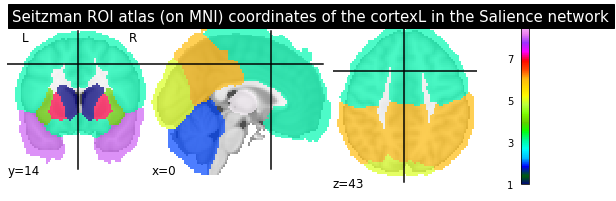

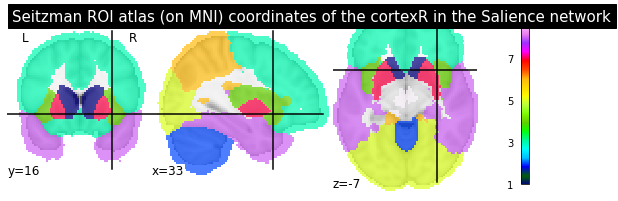

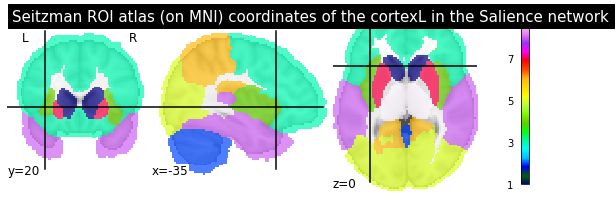

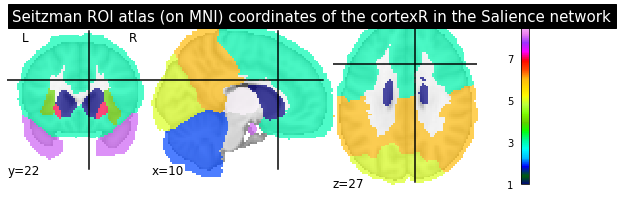

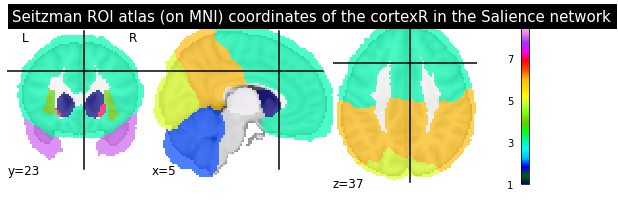

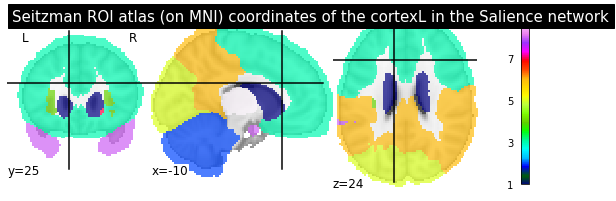

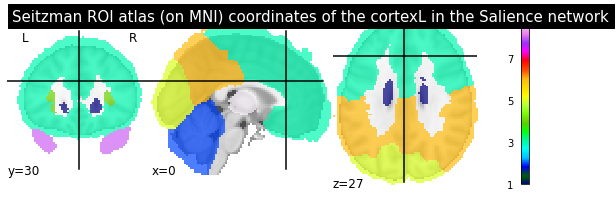

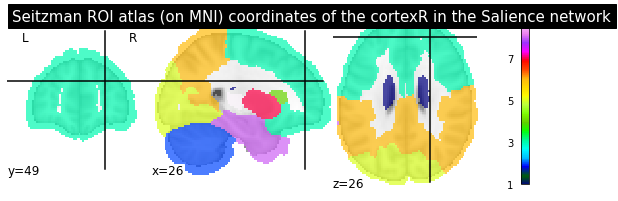

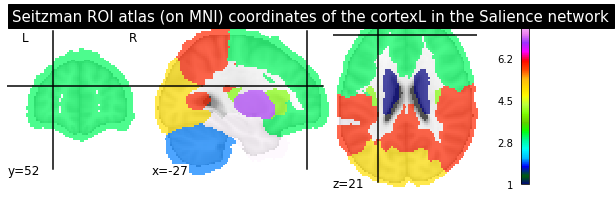

In [73]:
# print a list of available networks (want to use (subregions of) emotion and attention networks) in the atlas
print("Available networks via the Seitzman ROI atlas: \n", set(seitzman_rois.networks), f"\n{len(set(seitzman_rois.networks))} in total")
print("\nAvailable regions via the Seitzman ROI atlas: \n", set(seitzman_rois.regions), f"\n{len(set(seitzman_rois.regions))} in total")


# get unique network and region values from seitzman ROI atlas
networks_unique = [ID for ID in set(seitzman_rois.networks)]
regions_unique = [reg for reg in set(seitzman_rois.regions)]

# print thresholded spherical ROIs on MNI template image
for network in networks_unique[0:1]:
    # go through coupled lists and select by the network ID/name
    for roi, region, net_id in zip(seitzman_rois.rois, seitzman_rois.regions, seitzman_rois.networks):
        if net_id == network:
            ni_plt.plot_roi(f"{fsldir}data/atlases/MNI/MNI-maxprob-thr0-2mm.nii.gz", cut_coords=roi,
                            title=f"Seitzman ROI atlas (on MNI) coordinates of the {region} in the {net_id} network", colorbar=True)

In [112]:
# separate FSL's tissue propability maps Harvard_Oxford into distinct anatomical ROIs
# create dict for all ROIs and their labels
ROIs = {}

# identify important labels and collect them for each ROI by going through label-list and the Atlas image in parallel
cort_labels = [label for label in harox_cort.labels
               if re.match(r'.*(Frontal(?! Medial)|Cingulate.*anterior|Paracingulate|(?<!Planum )Temporal(?!(.*occipital|.*Fusiform))|Insula|hippocampal).*', label)]
sub_labels = [label for label in harox_sub.labels
              if re.match(r'.*(Hippo|Amygd).*', label)]

# subcortical areas are often split into left and right
# sort them by region
sub_labels = sorted([val for val in sub_labels], key=lambda val: val.split(' ', 1)[1])
# put them into tuples for later combination
sub_labels_paired = [[left, right] for left, right in pairwise(sub_labels) if left.split(' ', 1)[1] == right.split(' ', 1)[1]]
# create coherent list from items
sub_labels = [side for pair in sub_labels_paired for side in pair]
# define full list of labels, containing all relevant rois
full_labels = cort_labels + sub_labels

# control the outcome of the labelling collection
print(f"cortical labels:\n{cort_labels}\n{len(cort_labels)} labels in total\n",
      f"subcortical labels:\n{sub_labels}\n{len(sub_labels)} labels in total\n")

# associate ROIs in map object with correct labels -> into dict
for label in cort_labels:
    ROIs[label] = ni_img.index_img(harox_cort.maps, harox_cort.labels.index(label)-1)

for label in sub_labels:
    ROIs[label] = ni_img.index_img(harox_sub.maps, harox_sub.labels.index(label)-1)

# combine subcortical rois across both hemispheres (if split) into one mask image
for pair in sub_labels_paired:
    # access dict, add rois together and create new entry
    ROIs[pair[0].split(' ', 1)[1]] = ni_img.math_img('np.sum((img1, img2), axis=0)', img1=ROIs[pair[0]], img2=ROIs[pair[1]])

# drop the lateralised entries from the ROIs dict
lateral_labels = [roi for roi in full_labels if re.match(r'.*(left|right).*', roi, re.IGNORECASE)]
[ROIs.pop(roi) for roi in lateral_labels]

# combine all ROIs into one mask image
ROIs['Full_ROI_mask'] = ni_img.math_img('np.sum((allrois), axis=3)', allrois=ROIs.values())

# threshold probability images by respective value
for key in ROIs.keys():
    if key in cort_labels:
        ni_img.threshold_img(ROIs[key], 20)
    elif key in sub_labels:
        ni_img.threshold_img(ROIs[key], 25)
    # for the full mask
    else:
        ni_img.threshold_img(ROIs[key], 20)

# re-define full_labels
full_labels = [label for label in ROIs.keys()]

# binarise probability images to create masks for group analysis - for each area seperately and for the overall mask
for key in full_labels:
    ROIs[key] = ni_img.math_img('np.where(image > 0, 1, 0)', image=ROIs[key])

# save ROI masks to nii(.gz) file format
for roi in ROIs.keys():
    # also, get rid of whitespace in filenames
    group_roi_dir = f"{basedir}MNI_templates/{roi.replace(' ', '-')}_group.nii.gz"
    nb.save(ROIs[roi], group_roi_dir)

cortical labels:
['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Paracingulate Gyrus', 'Cingulate Gyrus, anterior division', 'Frontal Orbital Cortex', 'Parahippocampal Gyrus, anterior division', 'Parahippocampal Gyrus, posterior division', 'Frontal Operculum Cortex']
19 labels in total
 subcortical labels:
['Left Amygdala', 'Right Amygdala', 'Left Hippocampus', 'Right Hippocampus']
4 labels in total



# 1st-level modelling

In [5]:
# define input files
# the model-building-process appears to include highpass filtering, but M. Notter's FSL pipeline specifies it anyway ... we trust Michael^^ ... for now.
prepped_funcs = sorted([i for sub in FEDs
                        for i in data[sub]["files"]
                        if re.match(r'.*(FMRI).*(?<=-in2x)-hp.nii.gz$', i)])

# control presence and accuracy of preprocessed files
print("\nnumber of preprocessed files:\n", len(prepped_funcs))
print("\nnumber of subject directories:\n", len(FED_dirs))


number of preprocessed files:
 61

number of subject directories:
 61


In [6]:
# specify the design information and the model
for func, sub, subdir in zip(prepped_funcs, FEDs, FED_dirs):
    print(func, sub, subdir)  # for some reason, the print throws errors if you don't help it focus^^
    # define artdetect directory
    art_dir = f"{subdir}artdetect/"
    modelspec = pe.Node(model.SpecifyModel(), name="model_specifications")
    modelspec.inputs.input_units = 'secs'
    modelspec.inputs.functional_runs = func
    modelspec.inputs.time_repetition = data[sub]["parameters"]["EPI_RT"]
    modelspec.inputs.high_pass_filter_cutoff = 100  # FSL default -> makes about 55 volumes at TR = 1.8
    modelspec.inputs.subject_info = data[sub]["parameters"]["trialinfo"]
    modelspec.inputs.realignment_parameters = f"{subdir}FMRI_mc.nii.gz.par"  # first run without, but see if adding them might be better later
    modelspec.inputs.outlier_files = f"{art_dir}art.FMRI_mc_outliers.txt"
    modelspec.inputs.parameter_source = "FSL"
    modelspec.base_dir = subdir
    # run it
    res = modelspec.run()

/fMRI/FED007/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED007 /fMRI/FED007/
210325-09:47:14,394 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED007/model_specifications".
210325-09:47:14,402 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:14,440 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED008/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED008 /fMRI/FED008/
210325-09:47:14,446 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED008/model_specifications".
210325-09:47:14,452 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:14,490 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED009/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED009 /fMRI/FED009/
210325-09:47:14,492 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED009/model_specifications".
2

/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED007/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)


210325-09:47:14,638 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED012/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED012 /fMRI/FED012/
210325-09:47:14,639 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED012/model_specifications".
210325-09:47:14,645 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:14,680 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED013/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED013 /fMRI/FED013/
210325-09:47:14,682 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED013/model_specifications".
210325-09:47:14,690 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:14,723 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED014/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED014 /fMRI/FED014/
210325-09:47:14,725 nipype.workflow INFO:


/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED025/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)
/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED028/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)


210325-09:47:15,512 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED031/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED031 /fMRI/FED031/
210325-09:47:15,514 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED031/model_specifications".
210325-09:47:15,522 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:15,573 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED032/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED032 /fMRI/FED032/
210325-09:47:15,575 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED032/model_specifications".
210325-09:47:15,582 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:15,641 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED033/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED033 /fMRI/FED033/
210325-09:47:15,643 nipype.workflow INFO:


/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED039/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)


210325-09:47:16,122 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED044/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED044 /fMRI/FED044/
210325-09:47:16,124 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED044/model_specifications".
210325-09:47:16,130 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:16,175 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED045/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED045 /fMRI/FED045/
210325-09:47:16,177 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED045/model_specifications".
210325-09:47:16,185 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:16,225 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED046/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED046 /fMRI/FED046/
210325-09:47:16,228 nipype.workflow INFO:


/opt/miniconda-latest/envs/neuro/lib/python3.7/site-packages/nipype/algorithms/modelgen.py:491: UserWarning: loadtxt: Empty input file: "/fMRI/FED047/model_specifications/art.FMRI_mc_outliers.txt"
  outindices = np.loadtxt(filename, dtype=int)


210325-09:47:16,491 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED053/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED053 /fMRI/FED053/
210325-09:47:16,493 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED053/model_specifications".
210325-09:47:16,501 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:16,535 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED054/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED054 /fMRI/FED054/
210325-09:47:16,539 nipype.workflow INFO:
	 [Node] Setting-up "model_specifications" in "/fMRI/FED054/model_specifications".
210325-09:47:16,545 nipype.workflow INFO:
	 [Node] Running "model_specifications" ("nipype.algorithms.modelgen.SpecifyModel")
210325-09:47:16,584 nipype.workflow INFO:
	 [Node] Finished "model_specifications".
/fMRI/FED055/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz FED055 /fMRI/FED055/
210325-09:47:16,589 nipype.workflow INFO:


In [7]:
# generate GLM contrasts
# (condition: numbers):
# L-I-Neg: 1 L-I-Pos: 2 L-I-Neu: 3   R-I-Neg: 4 R-I-Pos: 5 R-I-Neu: 6
# L-V-Neg: 7 L-V-Pos: 8 L-V-Neu: 9   R-V-Neg: 10 R-V-Pos: 11 R-V-Neu: 12

# based on Koster et al. 2005:
# ENHANCED CUE VALIDITY:
# MDD: 1,4 - 7,10 (p<0.05); 2,5 - 8,11 (n.s.); 3,6 - 9,12 (n.s.)
# Control: 1,4 - 7,10 (p<0.05); 2,5 - 8,11 (p<0.05); 3,6 - 9,12 (n.s.)
# DIFFICULTY IN ATTENTIONAL DISENGAGEMENT:
# MDD: 1,4 - 3,6 (p<0.05); 2,5 - 3,6 (n.s.)
# Control: 1,4 - 3,6 (n.s.); 2,5 - 3,6 (n.s.)
# ATTENTIONAL DISENGAGEMENT:
# no distinguishing feature in previous publications -> None
# No reason to assume direction of effect a priori: Test T contrasts with one F contrast for each behavioural variable
ecv1 = ["NegI-NegV", "T", ["1", "4", "7", "10"], [0.5, 0.5, -0.5, -0.5]]  # think about weights for all contrasts again!
ecv2 = ["PosI-PosV", "T", ["2", "5", "8", "11"], [0.5, 0.5, -0.5, -0.5]]
ecv3 = ["NeuI-NeuV", "T", ["3", "6", "9", "12"], [0.5, 0.5, -0.5, -0.5]]
dad1 = ["NegI-NeuI", "T", ["1", "4", "3", "6"], [0.5, 0.5, -0.5, -0.5]]
dad2 = ["PosI-NeuI", "T", ["2", "5", "3", "6"], [0.5, 0.5, -0.5, -0.5]]
ecvF = ["Enhanced Cue Validity", "F", [ecv1, ecv2, ecv3]]
dadF = ["Difficulty Attentional Disengagement", "F", [dad1, dad2]]
# put all together for 1st level designs
contrasts = [ecv1, ecv2, ecv3, dad1, dad2, ecvF, dadF]

In [8]:
# use the design specifications to create an FSL specific 1st level design file (fsf)
for sub, subdir in zip(FEDs, FED_dirs):
    # define model directory
    model_dir = f"{subdir}model_specifications/"
    level1design = pe.Node(fsl.Level1Design(), name = "level1design")
    level1design.inputs.interscan_interval = data[sub]["parameters"]["EPI_RT"]
    level1design.inputs.bases = {'dgamma': {'derivs': True}}
    level1design.inputs.session_info = loadpkl(f"{model_dir}result_model_specifications.pklz").outputs.session_info
    level1design.inputs.contrasts = contrasts
#    level1design.inputs.orthogonalization =  # think about orthogonalising movement and outlier regressors
#                                              with respect to meaningful variance (Lindquist & Wager 2019)
#                                              fsf file: Maybe edit it directly in there?
    level1design.inputs.model_serial_correlations = True
    level1design.base_dir = model_dir
    # run it
    res = level1design.run()
    # print it
    print(res.outputs)

210325-09:47:23,993 nipype.workflow INFO:
	 [Node] Setting-up "level1design" in "/fMRI/FED007/model_specifications/level1design".
210325-09:47:24,51 nipype.workflow INFO:
	 [Node] Running "level1design" ("nipype.interfaces.fsl.model.Level1Design")
210325-09:47:24,81 nipype.workflow INFO:
	 [Node] Finished "level1design".

ev_files = ['/fMRI/FED007/model_specifications/level1design/ev_1_0_1.txt', '/fMRI/FED007/model_specifications/level1design/ev_2_0_3.txt', '/fMRI/FED007/model_specifications/level1design/ev_3_0_5.txt', '/fMRI/FED007/model_specifications/level1design/ev_4_0_7.txt', '/fMRI/FED007/model_specifications/level1design/ev_5_0_9.txt', '/fMRI/FED007/model_specifications/level1design/ev_6_0_11.txt', '/fMRI/FED007/model_specifications/level1design/ev_7_0_13.txt', '/fMRI/FED007/model_specifications/level1design/ev_8_0_15.txt', '/fMRI/FED007/model_specifications/level1design/ev_9_0_17.txt', '/fMRI/FED007/model_specifications/level1design/ev_10_0_19.txt', '/fMRI/FED007/model_specific

WIP!!! Create the text-editing commands to use in order to edit the fsf files. (sed in "edit_fsf_files.sh") \
After editing those, the analysis will switch to commandline based FSL in order to improve and fascilitate trouble shooting

In [9]:
# collect input files to hand to bash
fsf_files = sorted([os.path.join(f"{subdir}model_specifications/level1design/", file) 
                   for subdir in FED_dirs
                   for file in os.listdir(f"{subdir}model_specifications/level1design/")
                   if re.match(r'^.*run0.fsf$', file)])

# check how many values exist for the false parameters that FEAT_model puts in (EchoTime and DwellTime)
echotime = sorted([data[sub]["parameters"]["EPI_ET"] for sub in FEDs])
dwelltime = sorted([data[sub]["parameters"]["EPI_DT"] for sub in FEDs])

print(f"There are {len(echotime)} dwelltime values for {len(FEDs)} subjects",
      f"\n the unique values are: {set(echotime)}")
print(f"There are {len(dwelltime)} dwelltime values for {len(FEDs)} subjects",
      f"\n the unique values are: {set(dwelltime)}")

# transfer unique values to own variables
TE = [val for val in set(echotime)][0]
DT_1 = [val for val in set(dwelltime)][0]
DT_2 = [val for val in set(dwelltime)][1]

# list the subjects that have the first or second dwelltime value
firstDT_FEDs = [sub for sub in FEDs if data[sub]["parameters"]["EPI_DT"] == DT_1]
secondDT_FEDs = [sub for sub in FEDs if data[sub]["parameters"]["EPI_DT"] == DT_2]

print(f"The Dwelltime {DT_1}ms is valid for the following subjects: {firstDT_FEDs}")
print(f"The Dwelltime {DT_2}ms is valid for the following subjects: {secondDT_FEDs}")

There are 61 dwelltime values for 61 subjects 
 the unique values are: {25.0}
There are 61 dwelltime values for 61 subjects 
 the unique values are: {0.003, 0.0025}
The Dwelltime 0.003ms is valid for the following subjects: ['FED007', 'FED008', 'FED009', 'FED010', 'FED011', 'FED012', 'FED013', 'FED014', 'FED015', 'FED016', 'FED017', 'FED018', 'FED019', 'FED020', 'FED021', 'FED022', 'FED023', 'FED024', 'FED025', 'FED026', 'FED027', 'FED028', 'FED029', 'FED030', 'FED031', 'FED032', 'FED033', 'FED034', 'FED035', 'FED036', 'FED037', 'FED038', 'FED039', 'FED040', 'FED041', 'FED042', 'FED043', 'FED044', 'FED045', 'FED046', 'FED047', 'FED049', 'FED050', 'FED051', 'FED052', 'FED053', 'FED054', 'FED055', 'FED056', 'FED057', 'FED058', 'FED059']
The Dwelltime 0.0025ms is valid for the following subjects: ['FED060', 'FED061', 'FED062', 'FED063', 'FED064', 'FED065', 'FED066', 'FED067', 'FED068']


In [10]:
%%script env FSFS="$fsf_files" FIST_DTs="$firstDT_FEDs" SEC_DTs="$secondDT_FEDs" TE_CORRECT="$TE" DT1_CORRECT="$DT_1" DT2_CORRECT="$DT_2" bash
# switch from list to bash array and alter the string object accordingly
FSF_arr=($(echo $FSFS | sed -e 's/[][]//g' -e 's/,//g' -e "s/'//g"))
FIST_DTs=($(echo $FIST_DTs | sed -e 's/[][]//g' -e 's/,//g' -e "s/'//g"))
SEC_DTs=($(echo $SEC_DTs | sed -e 's/[][]//g' -e 's/,//g' -e "s/'//g"))
# echo the results
#echo ${FSF_arr[@]}

# use indices of full fsf array to check for their dwelltimes
for subjectindex in "${!FSF_arr[@]}"; do
# generate the subject ID from the fsf file
ID=$(cut -d'/' -f3 <<<${FSF_arr[subjectindex]})
if [[ " ${FIST_DTs[@]} " =~ " ${ID} " ]]; then
echo "${FSF_arr[subjectindex]} has a DwellTime of ${DT1_CORRECT}"
# replace the actual TE and DT with the correct values extracted by myself from the .json files
sed -i -e "/fmri(te)/s/35/${TE_CORRECT}/" -e "/fmri(dwell)/s/0.7/${DT1_CORRECT}/" ${FSF_arr[subjectindex]}
fi
if [[ " ${SEC_DTs[@]} " =~ " ${ID} " ]]; then
echo "${FSF_arr[subjectindex]} has a DwellTime of ${DT2_CORRECT}"
# replace the actual TE and DT with the correct values extracted by myself from the .json files
sed -i -e "/fmri(te)/s/35/${TE_CORRECT}/" -e "/fmri(dwell)/s/0.7/${DT2_CORRECT}/" ${FSF_arr[subjectindex]}
fi
done

/fMRI/FED007/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED008/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED009/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED010/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED011/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED012/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED013/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED014/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED015/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED016/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED017/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED018/model_specifications/level1design/run0.fsf has a DwellTime of 0.003
/fMRI/FED019/model_specifica

In [44]:
# create a FEAT specific (design)mat(rix) file from the first level design
for sub, subdir in zip(FEDs, FED_dirs):
    # define 1st-level directory
    level1_dir = f"{subdir}/model_specifications/level1design/"
    # collect event files
    event_files = [f"{level1_dir}{file}"
                   for file in os.listdir(level1_dir)
                   if re.match(r'ev.*.txt', file)]
    # sort event files by first number or last number after "Outlier"
    event_files.sort(key = lambda file: int(file.rsplit('_', 3)[1])
                     if re.match(r'.*ev_(?!Outlier).*.txt', file)
                     else int(file.rsplit('_', 1)[1][0:2]))
    # generate the design matrix
    modelgen = pe.Node(fsl.FEATModel(), name = "FEATmodel")
    modelgen.inputs.ev_files = event_files
    modelgen.inputs.fsf_file = f"{level1_dir}run0.fsf"
    modelgen.base_dir = level1_dir
    # run it
    res = modelgen.run()
    # print it
    print(res.outputs)

210202-09:24:51,938 nipype.workflow INFO:
	 [Node] Setting-up "FEATmodel" in "/fMRI/FED007/FEATmodel".
210202-09:24:51,942 nipype.workflow INFO:
	 [Node] Cached "FEATmodel" - collecting precomputed outputs
210202-09:24:51,943 nipype.workflow INFO:
	 [Node] "FEATmodel" found cached.

con_file = /fMRI/FED007/FEATmodel/run0.con
design_cov = /fMRI/FED007/FEATmodel/run0_cov.png
design_file = /fMRI/FED007/FEATmodel/run0.mat
design_image = /fMRI/FED007/FEATmodel/run0.png
fcon_file = /fMRI/FED007/FEATmodel/run0.fts

210202-09:24:51,945 nipype.workflow INFO:
	 [Node] Setting-up "FEATmodel" in "/fMRI/FED008/FEATmodel".
210202-09:24:51,954 nipype.workflow INFO:
	 [Node] Cached "FEATmodel" - collecting precomputed outputs
210202-09:24:51,955 nipype.workflow INFO:
	 [Node] "FEATmodel" found cached.

con_file = /fMRI/FED008/FEATmodel/run0.con
design_cov = /fMRI/FED008/FEATmodel/run0_cov.png
design_file = /fMRI/FED008/FEATmodel/run0.mat
design_image = /fMRI/FED008/FEATmodel/run0.png
fcon_file = /fMRI

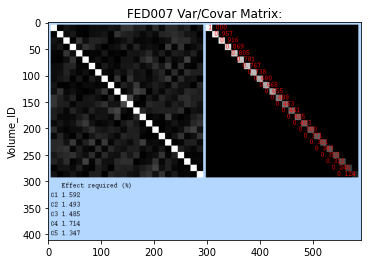

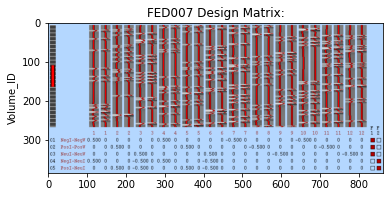

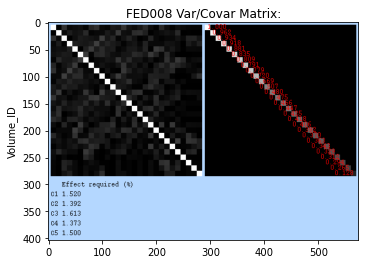

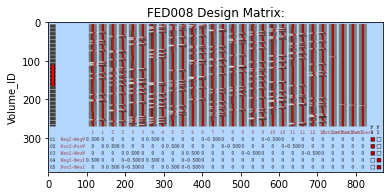

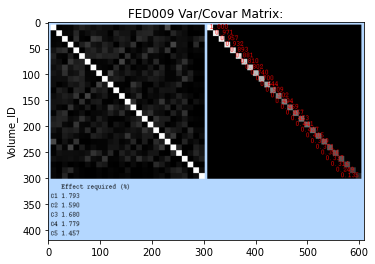

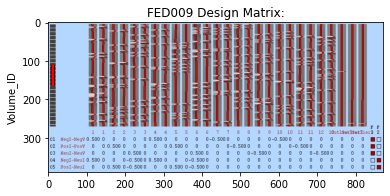

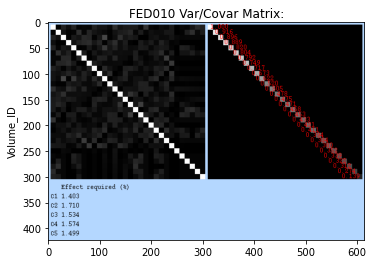

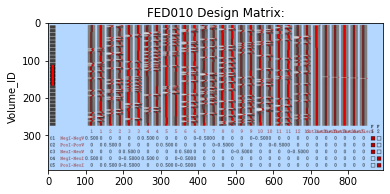

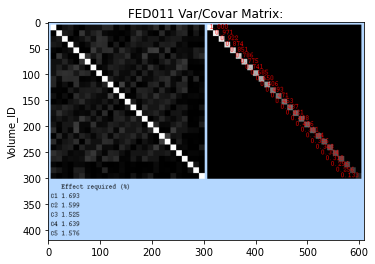

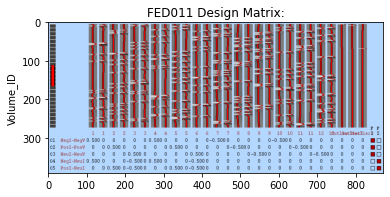

In [6]:
# before fitting the data to the model, check that everything looks alright
# define input files
# mat_files = [os.path.join(feddir, subdir, i)
#              for feddir in FED_dirs
#              for subdir in os.listdir(feddir)
#              if re.match(r'FEATmodel', subdir)
#              for i in os.listdir(os.path.join(feddir, subdir))
#              if re.match(r'run0.mat', i)]
# can't work with this yet, version error in scipy.io.loadmat -> .mat file is no MATLAB < 7.3 format file!
# fix via HDF5 Python library to read MATLAB 7.3 format mat files:

# for mat in mat_files[:1]:
#     # access each run0.mat file
#     with h5py.File(mat) as fslmat:
#  -> DOES NOT WORK! .mat file funny type?^^

#         # the design matrix and the names of the regressors are quite hidden in the fslmat variable
#         # extract it like so:
#         designMatrix = fslmat['SPM'][0][0].xX[0][0].X
#         names = [i[0] for i in fslmat['SPM'][0][0].xX[0][0].name[0]]

#         # before plotting, normalize the design matrix so that each column has a maximum amplitude of 1.
#         # this is just for visualization, otherwise the rotation parameters with their rather small values will not show up.
#         normed_design = designMatrix / np.abs(designMatrix).max(axis=0)

#         # plot the design matrix.
#         fig, ax = plt.subplots(figsize=(8, 8))
#         plt.imshow(normed_design, aspect='auto', cmap='gray', interpolation='none')
#         ax.set_ylabel('Volume ID')
#         ax.set_xticks(np.arange(len(names)))
#         ax.set_xticklabels(names, rotation=90);

# print the pngs for now
# define input files
mat_pngs = [os.path.join(feddir, subdir, i)
            for feddir in FED_dirs
            for subdir in os.listdir(feddir)
            if re.match(r'FEATmodel', subdir)
            for i in os.listdir(os.path.join(feddir, subdir))
            if re.match(r'(run0.png|run0_cov.png)', i)]

for img in mat_pngs[:12]:
    # define conditions for different titles
    if re.match(r'.*cov.*', img):
        title = f"{img.split('/',3)[2]} Var/Covar Matrix:"
    else:
        title = f"{img.split('/',3)[2]} Design Matrix:"
    # build the plot
    mat = mpl_img.imread(img)
    fig, ax = plt.subplots()
    plt.title(title)
    ax.set_ylabel("Volume_ID")
    plt.imshow(mat)

WIP!!!: correct parameters and thresholding in model fitting and then test contrast estimation below

In [7]:
# fit the data of each subject to the model
for func, sub, subdir in zip(prepped_funcs[:1], FEDs[:1], FED_dirs[:1]):
    FEAT_dir = f"{subdir}FEATmodel/"
    # refer to "https://www.fmrib.ox.ac.uk/datasets/techrep/tr04ss2/tr04ss2/node3.html" for effects of FILM - AutoCorrelation and PreWhitening
    modelestimate = pe.Node(fsl.FILMGLS(), name = "FEATmodel_fit")
    modelestimate.inputs.in_file = func
    modelestimate.inputs.design_file = f"{FEAT_dir}run0.mat"
    modelestimate.inputs.smooth_autocorr = True
    # likely SUSAN spatial size (sigma, i.e., half-width) of smoothing, in mm
    modelestimate.inputs.mask_size = 5
    # in typical fsl processing the input time series to FILM_GLS is scaled to a median value of 10000.
    # a threshold of 1000 represents 10% of this, to remove background noise.
    modelestimate.inputs.threshold = 0
#    modelestimate.inputs.full_data = True
    modelestimate.base_dir = subdir
    # run it
    res = modelestimate.run()
    # print it
    print(res.outputs)

210202-16:15:03,339 nipype.workflow INFO:
	 [Node] Setting-up "FEATmodel_fit" in "/fMRI/FED007/FEATmodel_fit".
210202-16:15:03,343 nipype.workflow INFO:
	 [Node] Running "FEATmodel_fit" ("nipype.interfaces.fsl.model.FILMGLS"), a CommandLine Interface with command:
film_gls --ms=5 --rn=results --sa --in=/fMRI/FED007/FMRI_mc-ri-s5-cr-m-in2x-hp.nii.gz --pd=/fMRI/FED007/FEATmodel/run0.mat --thr=0.000000
210202-16:15:03,398 nipype.interface INFO:
	 stdout 2021-02-02T16:15:03.398548:Log directory is: results
210202-16:15:06,179 nipype.interface INFO:
	 stdout 2021-02-02T16:15:06.179595:paradigm.getDesignMatrix().Nrows()=263
210202-16:15:06,180 nipype.interface INFO:
	 stdout 2021-02-02T16:15:06.179595:paradigm.getDesignMatrix().Ncols()=24
210202-16:15:06,181 nipype.interface INFO:
	 stdout 2021-02-02T16:15:06.179595:sizeTS=263
210202-16:15:06,182 nipype.interface INFO:
	 stdout 2021-02-02T16:15:06.179595:numTS=28136
210202-16:15:06,188 nipype.interface INFO:
	 stdout 2021-02-02T16:15:06.1882

In [8]:
# generate fsltype contrast estimates (will take these to 2nd level later on)
for sub, subdir in zip(FEDs[:1], FED_dirs[:1]):
    # create model dirs
    FEATfit_dir = f"{subdir}FEATmodel_fit/"
    FEAT_dir = f"{subdir}FEATmodel/"
    # gather parameter estimates
    par_ests = [f"{FEATfit_dir}results/{pe_file}" for pe_file in os.listdir(f"{FEATfit_dir}results/") if re.match(r'^pe.*', pe_file)]
    # sort parameter estimates correctly by pe number
    par_ests.sort(key = lambda file: int(file.split('pe', 1)[1].split('.', 1)[0]))
    # estimate contrasts
    conestimate = pe.Node(fsl.ContrastMgr(), name = "1stlevel_contrast_estimates")
    conestimate.inputs.corrections = loadpkl(f"{FEATfit_dir}result_FEATmodel_fit.pklz").outputs.corrections  # still missing!
    conestimate.inputs.param_estimates = par_ests
    conestimate.inputs.sigmasquareds = f"{FEATfit_dir}results/sigmasquareds.nii.gz"
    conestimate.inputs.dof_file = f"{FEATfit_dir}results/dof"
    conestimate.inputs.tcon_file = f"{FEAT_dir}run0.con"
    conestimate.inputs.fcon_file = f"{FEAT_dir}run0.fts"
    conestimate.base_dir = subdir
    # run it
    res = conestimate.run()
    # print it
    print(res.outputs)

AttributeError: 'FILMGLSOutputSpec507' object has no attribute 'corrections'

# QC

To do:
0. Rewrite 1st level to SPM, if no reply^^
1. Reduce printed output in all notebooks to an appropriate amount
2. Look for Jupyterlab /Markdown Latex integration/other options

In [22]:
a = np.full((3, 3, 3), 2)
b = np.full((3, 3, 3), 0)
b[1].fill(2)

print(f"a:\n{a}\n", f"b:\n{b}\n")

c = np.add(a, b)

print(f"c:\n{c}")

a:
[[[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]]
 b:
[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]

c:
[[[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]]


In [10]:
# The the maximum value entry to None in oder to tell panda to print all rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(data["FED007"]["parameters"]["modelparams"])

     Sub Num FED_XXX  Condition      RT  COTcorrect model_FED_ID
20                 7          1  360.85    20273.02            7
22                 7          1  321.38    58437.96            7
7                  7          1  281.30   111040.41            7
18                 7          1  577.72   196397.07            7
19                 7          1  296.54   232598.84            7
..               ...        ...     ...         ...          ...
168                7         12  244.92   275134.06            7
170                7         12  258.64   277469.33            7
163                7         12  345.27   337418.97            7
164                7         12  366.70   349512.31            7
166                7         12  333.56   438719.50            7

[178 rows x 5 columns]
